#### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from extra_helpers import *
from feature_importance import *
from proj1_helpers import *
from data_processing import *
from implementations import *
from objective_functions import *
from run_functions import *

## Data

In [2]:
## 1 - Data importation.
y, tX, ids = load_csv_data("data/train.csv")

## 2 - Changing "-1" to "0" in the response vector
##     to be in phase with the major part of the scientific literature.
y[np.where(y == -1)] = 0

## 3 - Sending the categorical feature (PRI_jet_num) as the last column of the data matrix
##     using the rearrange_continuous_categorical_features() function.
tX = rearrange_continuous_categorical_features(tX)

In [3]:
## 1 - Knowing that the last column is the categorical feature, we isolate this column
##     and identify the indexes for each cases, i.e. PRI_jet_num = 0, 1, 2 or 3.
categories = tX[:, -1]
zeros_index = np.where(categories == 0)[0]
one_index = np.where(categories == 1)[0]
two_index = np.where(categories == 2)[0]
three_index = np.where(categories == 3)[0]

## 2 - We isolate the four different datasets corresponding to the different cases of PRI_jet_num.
##   - For each of them:
##      - we identify the features having null variance and we delete them.
##      - we transform all -999 values to np.nan.
##      - we impute the missing values using the median imputation technique.
zeros = tX[zeros_index, :]
y_zero = y[zeros_index]
null_var_index_zero = np.where(np.std(zeros, axis=0) == 0)[0]
zeros = np.delete(zeros, null_var_index_zero, axis=1)
zeros[np.where(zeros == -999)] = np.nan
zeros = median_imputation(zeros)

ones = tX[one_index, :]
y_one = y[one_index]
null_var_index_one = np.where(np.std(ones, axis=0) == 0)[0]
ones = np.delete(ones, null_var_index_one, axis=1)
ones[np.where(ones == -999)] = np.nan
ones = median_imputation(ones)

two = tX[two_index, :]
y_two = y[two_index]
null_var_index_two = np.where(np.std(two, axis=0) == 0)[0]
two = np.delete(two, null_var_index_two, axis=1)
two[np.where(two == -999)] = np.nan
two = median_imputation(two)

three = tX[three_index, :]
y_three = y[three_index]
null_var_index_three = np.where(np.std(three, axis=0) == 0)[0]
three = np.delete(three, null_var_index_three, axis=1)
three[np.where(three == -999)] = np.nan
three = median_imputation(three)

## Searching the optimal data augmentation for each datasets

After concluding that the optimal penalty parameter ($\lambda^{*}_{i}$) for each model were zeros, we lightened the code by deleting this part. For the sake of transparency we will leave visible the code we developed using the golden search algorithm for the model $i = 0$ as a text cell. In the same way, we noted that pairwise interactions were always beneficial.

The following cells show how we found the most adequate polynomial degree for each model $j$.

The procedure is the following :

for $k = 1, 2, ..., 20$ being the degree of the polynomial augmentation:

    1 - We augment the data.
    2 - We scale the data.
    3 - We apply a change of basis.
    4 - We add a bias term.
    5 - We perform 5-fold cross validation.

### PRI_jet_num = 0

In [4]:
means_0 = list()
medians_0 = list()
stds_0 = list()
for i in range(1, 21):
    print("*****************")
    print("\n")
    print(f"Polynomial of degree = {i}")
    tx = process_data(x=zeros, degree=i, pairwise=True, bias=False) # Data augmentation.
    tx, _, __ = gaussian_scaling(tx) # Scaling.
    tx, tosolve_tx = orthogonal_basis(tx) # Change of basis.
    tx = process_data(x=tx, degree=0, pairwise=False, bias=True) # Adding a bias.
    acc, m, md, std_ = cross_validation(y_zero, tx, k_fold=5) # Cross-validating.
    means_0.append(m)
    medians_0.append(md)
    stds_0.append(std_)
    print("\n")

*****************


Polynomial of degree = 1

Pairwise interaction progress : 100.0%                 


C:\Users\Antek\GitHub\HBP\scripts\objective_functions.py:35: RuntimeWarning: divide by zero encountered in log
  (1 - y).T.dot(np.log(1 - proba)))


CV 1/5 --- Validation accuracy : 83.765%  
CV 2/5 --- Validation accuracy : 84.096%  
CV 3/5 --- Validation accuracy : 84.116%  
CV 4/5 --- Validation accuracy : 84.106%  
CV 5/5 --- Validation accuracy : 84.496%  

 
 Mean validation accuracy = 0.8411570413372035 
 Median validation accuracy = 0.8410569512561306 
 Std validation accuracy = 0.0023146575148933713


*****************


Polynomial of degree = 2

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.076%  
CV 2/5 --- Validation accuracy : 83.976%  
CV 3/5 --- Validation accuracy : 84.191%  
CV 4/5 --- Validation accuracy : 83.981%  
CV 5/5 --- Validation accuracy : 84.571%  

 
 Mean validation accuracy = 0.8415874286858174 
 Median validation accuracy = 0.8407566810129117 
 Std validation accuracy = 0.0022057546771379164


*****************


Polynomial of degree = 3

Polynomial augmentation progress : 100.0%                 


C:\Users\Antek\GitHub\HBP\scripts\objective_functions.py:29: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


CV 3/5 --- Validation accuracy : 84.546%
CV 4/5 --- Validation accuracy : 83.911%  
CV 5/5 --- Validation accuracy : 84.591%  

 
 Mean validation accuracy = 0.8429986988289461 
 Median validation accuracy = 0.8432088879991992 
 Std validation accuracy = 0.0025538470117212686


*****************


Polynomial of degree = 4

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.411%  
CV 2/5 --- Validation accuracy : 84.336%  
CV 3/5 --- Validation accuracy : 84.611%  
CV 4/5 --- Validation accuracy : 84.381%  
CV 5/5 --- Validation accuracy : 84.946%  

 
 Mean validation accuracy = 0.8453708337503754 
 Median validation accuracy = 0.844109698728856 
 Std validation accuracy = 0.0022531164303193764


*****************


Polynomial of degree = 5

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 

C:\Users\Antek\GitHub\HBP\scripts\objective_functions.py:29: RuntimeWarning: invalid value encountered in true_divide
  return 1.0 / (1 + np.exp(-x))
C:\Users\Antek\GitHub\HBP\scripts\implementations.py:208: RuntimeWarning: invalid value encountered in greater
  pred = (sigmoid(x_test@w) > thresh)*1


CV 1/5 --- Validation accuracy : 84.221%
CV 2/5 --- Validation accuracy : 84.501%  
CV 3/5 --- Validation accuracy : 84.526%  
CV 4/5 --- Validation accuracy : 84.396%  
CV 5/5 --- Validation accuracy : 84.991%  

 
 Mean validation accuracy = 0.8452707436693023 
 Median validation accuracy = 0.8450105094585126 
 Std validation accuracy = 0.0025587457122779435


*****************


Polynomial of degree = 7

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.581%  
CV 2/5 --- Validation accuracy : 84.641%  
CV 3/5 --- Validation accuracy : 84.656%  
CV 4/5 --- Validation accuracy : 84.576%  
CV 5/5 --- Validation accuracy : 85.012%  

 
 Mean validation accuracy = 0.8469322390151136 
 Median validation accuracy = 0.8464117705935341 
 Std validation accuracy = 0.001622756258706687


*****************


Polynomial of degree = 8

Polynomial augmentation progress : 100.0%                 
Pai

C:\Users\Antek\GitHub\HBP\scripts\objective_functions.py:29: RuntimeWarning: overflow encountered in true_divide
  return 1.0 / (1 + np.exp(-x))


CV 4/5 --- Validation accuracy : 84.601%  
CV 5/5 --- Validation accuracy : 85.152%  

 
 Mean validation accuracy = 0.8484235812231008 
 Median validation accuracy = 0.8477129416474827 
 Std validation accuracy = 0.0020272627606721357


*****************


Polynomial of degree = 12

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.726%  
CV 2/5 --- Validation accuracy : 84.691%  
CV 3/5 --- Validation accuracy : 84.846%  
CV 4/5 --- Validation accuracy : 84.741%  
CV 5/5 --- Validation accuracy : 85.237%  

 
 Mean validation accuracy = 0.8484836352717446 
 Median validation accuracy = 0.8474126714042638 
 Std validation accuracy = 0.002009443924603148


*****************


Polynomial of degree = 13

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.806%  
CV 2/5 --- Validation accurac

#### Plot  PRI_jet_num = 0

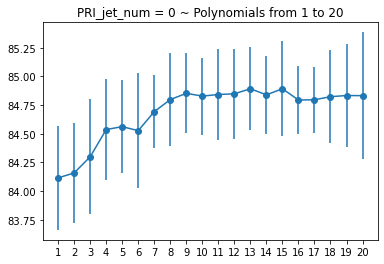

In [5]:
error = 100*1.96*np.array(stds_0)
fig, ax0 = plt.subplots(nrows=1, sharex=True)
ax0.errorbar(np.arange(1, np.array(means_0).shape[0]+1), np.array(means_0)*100, yerr=error, fmt='-o')
ax0.set_title('PRI_jet_num = 0 ~ Polynomials from 1 to 20')
plt.xticks(np.arange(1, np.array(means_0).shape[0]+1))
plt.show()

### PRI_jet_num = 1

In [6]:
means_1 = list()
medians_1 = list()
stds_1 = list()
for i in range(1, 21):
    print("*****************")
    print("\n")
    print(i)
    tx = process_data(x = ones, degree=i, pairwise=True, bias=False) # Data augmentation.
    tx, _, __ = gaussian_scaling(tx) # Scaling.
    tx, tosolve_tx = orthogonal_basis(tx) # Change of basis.
    tx = process_data(x = tx, degree=0, pairwise=False, bias=True) # Adding a bias.
    acc, m, md, std_ = cross_validation(y_one, tx, k_fold=5) # Cross-validating.
    means_1.append(m)
    medians_1.append(md)
    stds_1.append(std_)

*****************


1

Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 78.327%  
CV 2/5 --- Validation accuracy : 78.372%  
CV 3/5 --- Validation accuracy : 78.798%  
CV 4/5 --- Validation accuracy : 78.682%  
CV 5/5 --- Validation accuracy : 78.714%  

 
 Mean validation accuracy = 0.7857879803972143 
 Median validation accuracy = 0.7868197059582152 
 Std validation accuracy = 0.0019124355934644868
*****************


2

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 79.424%  
CV 2/5 --- Validation accuracy : 79.978%  
CV 3/5 --- Validation accuracy : 79.752%  
CV 4/5 --- Validation accuracy : 80.113%  
CV 5/5 --- Validation accuracy : 80.436%  

 
 Mean validation accuracy = 0.7994067578024247 
 Median validation accuracy = 0.7997807583182873 
 Std validation accuracy = 0.0034041569518277843
*****************


3

Polynomial augmentation progre

C:\Users\Antek\GitHub\HBP\scripts\objective_functions.py:34: RuntimeWarning: divide by zero encountered in log
  loss = (-1/len(y))*(y.T.dot(np.log(proba)) +


CV 1/5 --- Validation accuracy : 80.558%  
CV 2/5 --- Validation accuracy : 80.668%  
CV 3/5 --- Validation accuracy : 80.926%  
CV 4/5 --- Validation accuracy : 81.061%  
CV 5/5 --- Validation accuracy : 81.41%   

 
 Mean validation accuracy = 0.8092468403404695 
 Median validation accuracy = 0.809259736909982 
 Std validation accuracy = 0.003012777758861966
*****************


5

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 80.636%  
CV 2/5 --- Validation accuracy : 80.733%  
CV 3/5 --- Validation accuracy : 80.868%  
CV 4/5 --- Validation accuracy : 81.326%  
CV 5/5 --- Validation accuracy : 81.442%  

 
 Mean validation accuracy = 0.8100077379417074 
 Median validation accuracy = 0.808679391281919 
 Std validation accuracy = 0.003234083204780126
*****************


6

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                

CV 4/5 --- Validation accuracy : 81.603%  
CV 5/5 --- Validation accuracy : 81.738%  

 
 Mean validation accuracy = 0.8137735362393602 
 Median validation accuracy = 0.8131287077637348 
 Std validation accuracy = 0.002774111757876282


#### Plot  PRI_jet_num = 1

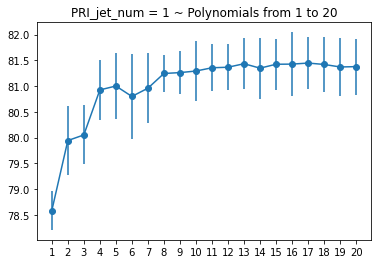

In [7]:
error = 100*1.96*np.array(stds_1)
fig, ax1 = plt.subplots(nrows=1, sharex=True)
ax1.errorbar(np.arange(1, np.array(means_1).shape[0]+1), np.array(means_1)*100, yerr=error, fmt='-o')
ax1.set_title('PRI_jet_num = 1 ~ Polynomials from 1 to 20')
plt.xticks(np.arange(1, np.array(means_1).shape[0]+1))
plt.show()

### PRI_jet_num = 2

In [8]:
means_2 = list()
medians_2 = list()
stds_2 = list()
for i in range(1, 21):
    print("*****************")
    print("\n")
    print(i)
    tx = process_data(x = two, degree=i, pairwise=True, bias=False) # Data augmentation.
    tx, _, __ = gaussian_scaling(tx) # Scaling.
    tx, tosolve_tx = orthogonal_basis(tx) # Change of basis.
    tx = process_data(x = tx, degree=0, pairwise=False, bias=True) # Adding a bias.
    acc, m, md, std_ = cross_validation(y_two, tx, k_fold=5) # Cross-validating.
    means_2.append(m)
    medians_2.append(md)
    stds_2.append(std_)

*****************


1

Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 83.742%  
CV 2/5 --- Validation accuracy : 83.077%  
CV 3/5 --- Validation accuracy : 83.762%  
CV 4/5 --- Validation accuracy : 82.958%  
CV 5/5 --- Validation accuracy : 83.067%  

 
 Mean validation accuracy = 0.833210918114144 
 Median validation accuracy = 0.8307692307692307 
 Std validation accuracy = 0.003542520615137988
*****************


2

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 83.672%  
CV 2/5 --- Validation accuracy : 83.127%  
CV 3/5 --- Validation accuracy : 83.94%   
CV 4/5 --- Validation accuracy : 83.186%  
CV 5/5 --- Validation accuracy : 83.097%  

 
 Mean validation accuracy = 0.8340446650124068 
 Median validation accuracy = 0.8318610421836228 
 Std validation accuracy = 0.003402020404766696
*****************


3

Polynomial augmentation progress 

CV 2/5 --- Validation accuracy : 84.397%  
CV 3/5 --- Validation accuracy : 84.764%  
CV 4/5 --- Validation accuracy : 84.337%  
CV 5/5 --- Validation accuracy : 83.95%   

 
 Mean validation accuracy = 0.8439503722084366 
 Median validation accuracy = 0.843970223325062 
 Std validation accuracy = 0.002662862850749587
*****************


18

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 83.563%  
CV 2/5 --- Validation accuracy : 84.109%  
CV 3/5 --- Validation accuracy : 84.427%  
CV 4/5 --- Validation accuracy : 84.476%  
CV 5/5 --- Validation accuracy : 82.65%   

 
 Mean validation accuracy = 0.8384516129032257 
 Median validation accuracy = 0.841091811414392 
 Std validation accuracy = 0.006803056156282382
*****************


19

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 84.347

#### Plot  PRI_jet_num = 2

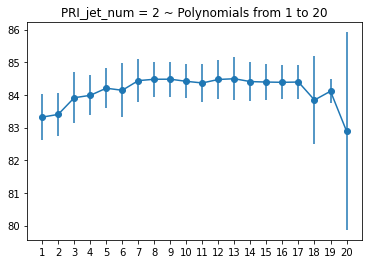

In [9]:
error = 100*1.96*np.array(stds_2)
fig, ax2 = plt.subplots(nrows=1, sharex=True)
ax2.errorbar(np.arange(1, np.array(means_2).shape[0]+1), np.array(means_2)*100, yerr=error, fmt='-o')
ax2.set_title('PRI_jet_num = 2 ~ Polynomials from 1 to 20')
plt.xticks(np.arange(1, np.array(means_2).shape[0]+1))
plt.show()

### PRI_jet_num = 3

In [10]:
means_3 = list()
medians_3 = list()
stds_3 = list()
for i in range(1, 21):
    print("\n")
    print("*****************")
    print("\n")
    print(i)
    tx = process_data(x = three, degree=i, pairwise=True, bias=False) # Data augmentation.
    tx, _, __ = gaussian_scaling(tx) # Scaling.
    tx, tosolve_tx = orthogonal_basis(tx) # Change of basis.
    tx = process_data(x = tx, degree=0, pairwise=False, bias=True) # Adding a bias.
    acc, m, md, std_ = cross_validation(y_three, tx, k_fold=5) # Cross-validating.
    means_3.append(m)
    medians_3.append(md)
    stds_3.append(std_)



*****************


1

Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 81.679%  
CV 2/5 --- Validation accuracy : 81.498%  
CV 3/5 --- Validation accuracy : 83.506%  
CV 4/5 --- Validation accuracy : 81.273%  
CV 5/5 --- Validation accuracy : 82.04%   

 
 Mean validation accuracy = 0.8199909747292418 
 Median validation accuracy = 0.8167870036101084 
 Std validation accuracy = 0.007943263799887395


*****************


2

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 81.995%  
CV 2/5 --- Validation accuracy : 81.701%  
CV 3/5 --- Validation accuracy : 83.213%  
CV 4/5 --- Validation accuracy : 81.002%  
CV 5/5 --- Validation accuracy : 82.04%   

 
 Mean validation accuracy = 0.8199007220216608 
 Median validation accuracy = 0.8199458483754513 
 Std validation accuracy = 0.007152776191723693


*****************


3

Polynomial augmentation pr

CV 2/5 --- Validation accuracy : 83.394%  
CV 3/5 --- Validation accuracy : 83.867%  
CV 4/5 --- Validation accuracy : 83.055%  
CV 5/5 --- Validation accuracy : 83.348%  

 
 Mean validation accuracy = 0.8349277978339351 
 Median validation accuracy = 0.8339350180505415 
 Std validation accuracy = 0.003022455243617403


*****************


18

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 83.755%  
CV 2/5 --- Validation accuracy : 83.348%  
CV 3/5 --- Validation accuracy : 78.791%  
CV 4/5 --- Validation accuracy : 83.258%  
CV 5/5 --- Validation accuracy : 83.461%  

 
 Mean validation accuracy = 0.825225631768953 
 Median validation accuracy = 0.8334837545126353 
 Std validation accuracy = 0.018734557821470488


*****************


19

Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
CV 1/5 --- Validation accuracy : 8

#### Plot  PRI_jet_num = 3

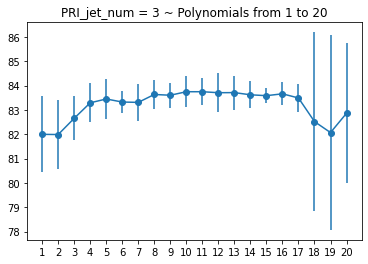

In [11]:
error = 100*1.96*np.array(stds_3)
fig, ax3 = plt.subplots(nrows=1, sharex=True)
ax3.errorbar(np.arange(1, np.array(means_3).shape[0]+1), np.array(means_3)*100, yerr=error, fmt='-o')
ax3.set_title('PRI_jet_num = 3 ~ Polynomials from 1 to 20')
plt.xticks(np.arange(1, np.array(means_3).shape[0]+1))
plt.show()

## Model training

At this stage, the optimal parameters for all four models were determined. In this section, we train the four models starting with the Newton's method (because of the nice convergence of this algorithm) and if the optimization stops prematurely because of singular hessian or because of numerical instabilities, we pursue with a gradient descent algorithm.

### Model$_{PRI jet num = 0}$ i.e. $w_{0}$

In [12]:
## We apply the relevant transformations based on optimal parameters found earlier.
tx_zeros = process_data(x = zeros, degree=13, pairwise=True, bias=False)
tx_zeros, mean_tx_zeros, std_tx_zeros = gaussian_scaling(tx_zeros)
tx_zeros, tosolve_tx_zeros = orthogonal_basis(tx_zeros)
tx_zeros = process_data(x = tx_zeros, degree=0, pairwise=False, bias=True)


Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 


In [13]:
## Newton's method & gradient descent.

loss_0, w_0, grad_norm_0 = logistic_newton_descent(y_zero,
                                                   tx_zeros,
                                                   w=np.zeros(tx_zeros.shape[1]),
                                                   lambda_=0,
                                                   max_iters=1000,
                                                   eps=1e-10,
                                                   w_start_OLS=True)

loss_0, w_0, grad_norm_0 = logistic_gradient_descent(y_zero,
                                                     tx_zeros,
                                                     w=w_0,
                                                     max_iters=30000,
                                                     lambda_=0,
                                                     gamma=0.05,
                                                     eps=1e-4,
                                                     w_start_OLS=False)

In [14]:
## 1 - We search for the optimal threshold that maximize the accuracy.
## 2 - We check the in-sample performance of our model.
thresh_0 = threshold(y_zero, sigmoid(tx_zeros@w_0))
pred = (sigmoid(tx_zeros@w_0) > thresh_0)*1
accuracy = 1 - sum(np.abs(pred - y_zero))/len(y_zero)
accuracy

0.851350675087326

Here we show how we have saved the parameters for model 0. These parameters are loaded into the run.py in order to save execution time.

In [ ]:
# np.savetxt("data/run/w_0.csv", w_0, delimiter=",")
# np.savetxt("data/run/thresh_0.csv", np.c_[thresh_0, 1], delimiter=",")
# np.savetxt("data/run/null_var_index_zero.csv", null_var_index_zero, delimiter=",")
# np.savetxt("data/run/mean_tx_zeros.csv", mean_tx_zeros, delimiter=",")
# np.savetxt("data/run/std_tx_zeros.csv", std_tx_zeros, delimiter=",")
# np.savetxt("data/run/tosolve_tx_zeros.csv", tosolve_tx_zeros, delimiter=",")

### Model$_{PRI jet num = 1}$ i.e. $w_{1}$

In [15]:
## We apply the relevant transformations based on optimal parameters found earlier.
tx_ones = process_data(x = ones, degree=17, pairwise=True, bias=False)
tx_ones, mean_tx_ones, std_tx_ones = gaussian_scaling(tx_ones)
tx_ones, tosolve_tx_ones = orthogonal_basis(tx_ones)
tx_ones = process_data(x = tx_ones, degree=0, pairwise=False, bias=True)


Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 


In [16]:
## Newton's method & gradient descent.

loss_1, w_1, grad_norm_1 = logistic_newton_descent(y_one,
                                                   tx_ones,
                                                   w=np.zeros(tx_ones.shape[1]),
                                                   lambda_=0,
                                                   max_iters=1000,
                                                   eps=1e-10,
                                                   w_start_OLS=True)

loss_1, w_1, grad_norm_1 = logistic_gradient_descent(y_one,
                                                     tx_ones,
                                                     w=w_1,
                                                     max_iters=30000,
                                                     lambda_=0,
                                                     gamma=0.05,
                                                     eps=2e-4,
                                                     w_start_OLS=False)

In [17]:
## 1 - We search for the optimal threshold that maximize the accuracy.
## 2 - We check the in-sample performance of our model.
thresh_1 = threshold(y_one, sigmoid(tx_ones@w_1))
pred = (sigmoid(tx_ones@w_1) > thresh_1)*1
accuracy = 1 - sum(np.abs(pred - y_one))/len(y_one)
accuracy

0.819134942742185

Here we show how we have saved the parameters for model 1. These parameters are loaded into the run.py in order to save execution time.

In [ ]:
# np.savetxt("data/run/w_1.csv", w_1, delimiter=",")
# np.savetxt("data/run/thresh_1.csv", np.c_[thresh_1, 1], delimiter=",")
# np.savetxt("data/run/null_var_index_one.csv", null_var_index_one, delimiter=",")
# np.savetxt("data/run/mean_tx_ones.csv", mean_tx_ones, delimiter=",")
# np.savetxt("data/run/std_tx_ones.csv", std_tx_ones, delimiter=",")
# np.savetxt("data/run/tosolve_tx_ones.csv", tosolve_tx_ones, delimiter=",")

### Model$_{PRI jet num = 2}$ i.e. $w_{2}$

In [18]:
## We apply the relevant transformations based on optimal parameters found earlier.
tx_two = process_data(x = two, degree=13, pairwise=True, bias=False)
tx_two, mean_tx_two, std_tx_two = gaussian_scaling(tx_two)
tx_two, tosolve_tx_two = orthogonal_basis(tx_two)
tx_two = process_data(x = tx_two, degree=0, pairwise=False, bias=True)


Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 


In [19]:
## Newton's method & gradient descent.

loss_2, w_2, grad_norm_2 = logistic_newton_descent(y_two,
                                                   tx_two,
                                                   w=np.zeros(tx_two.shape[1]),
                                                   lambda_=0,
                                                   max_iters=1000,
                                                   eps=1e-10,
                                                   w_start_OLS=True)

loss_2, w_2, grad_norm_2 = logistic_gradient_descent(y_two,
                                                     tx_two,
                                                     w=w_2,
                                                     max_iters=30000,
                                                     lambda_=0,
                                                     gamma=0.05,
                                                     eps=1e-4,
                                                     w_start_OLS=False)

In [25]:
## 1 - We search for the optimal threshold that maximize the accuracy.
## 2 - We check the in-sample performance of our model.
thresh_2 = threshold(y_two, sigmoid(tx_two@w_2))
pred = (sigmoid(tx_two@w_2) > thresh_2)*1
accuracy = 1 - sum(np.abs(pred - y_two))/len(y_two)
accuracy

0.8543639214752179

Here we show how we have saved the parameters for model 2. These parameters are loaded into the run.py in order to save execution time.

In [ ]:
# np.savetxt("data/run/w_2.csv", w_2, delimiter=",")
# np.savetxt("data/run/thresh_2.csv", np.c_[thresh_2, 1], delimiter=",")
# np.savetxt("data/run/null_var_index_two.csv", null_var_index_two, delimiter=",")
# np.savetxt("data/run/mean_tx_two.csv", mean_tx_two, delimiter=",")
# np.savetxt("data/run/std_tx_two.csv", std_tx_two, delimiter=",")
# np.savetxt("data/run/tosolve_tx_two.csv", tosolve_tx_two, delimiter=",")

### Model$_{PRI jet num = 3}$ i.e. $w_{3}$

In [20]:
## We apply the relevant transformations based on optimal parameters found earlier.
tx_three = process_data(x = three, degree=10, pairwise=True, bias=False)
tx_three, mean_tx_three, std_tx_three = gaussian_scaling(tx_three)
tx_three, tosolve_tx_three = orthogonal_basis(tx_three)
tx_three = process_data(x = tx_three, degree=0, pairwise=False, bias=True)


Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 


In [21]:
## Newton's method & gradient descent.

loss_3, w_3, grad_norm_3 = logistic_newton_descent(y_three,
                                                   tx_three,
                                                   w=np.zeros(tx_three.shape[1]),
                                                   lambda_=0,
                                                   max_iters=1000,
                                                   eps=1e-10,
                                                   w_start_OLS=True)

loss_3, w_3, grad_norm_3 = logistic_gradient_descent(y_three,
                                                     tx_three,
                                                     w=w_3,
                                                     max_iters=30000,
                                                     lambda_=0,
                                                     gamma=0.05,
                                                     eps=1e-4,
                                                     w_start_OLS=False)

In [22]:
## 1 - We search for the optimal threshold that maximize the accuracy.
## 2 - We check the in-sample performance of our model.
thresh_3 = threshold(y_three, sigmoid(tx_three@w_3))
pred = (sigmoid(tx_three@w_3) > thresh_3)*1
accuracy = 1 - sum(np.abs(pred - y_three))/len(y_three)
accuracy

0.8558924381880527

Here we show how we have saved the parameters for model 3. These parameters are loaded into the run.py in order to save execution time.

In [ ]:
# np.savetxt("data/run/w_3.csv", w_3, delimiter=",")
# np.savetxt("data/run/thresh_3.csv", np.c_[thresh_3, 1], delimiter=",")
# np.savetxt("data/run/null_var_index_three.csv", null_var_index_three, delimiter=",")
# np.savetxt("data/run/mean_tx_three.csv", mean_tx_three, delimiter=",")
# np.savetxt("data/run/std_tx_three.csv", std_tx_three, delimiter=",")
# np.savetxt("data/run/tosolve_tx_three.csv", tosolve_tx_three, delimiter=",")

## Predictions

### Test set processing

In [23]:
## 1 - Loading the test set.
## 2 - Splitting the test set according to PRI_jet_num.
predictions, tX_test, ids_test = load_csv_data("data/test.csv")
zeros_test, ones_test, two_test, three_test, zeros_index_test, one_index_test, two_index_test, three_index_test = PRI_jet_num_split(
    tX_test)

In [26]:
## Applying the relevant transformation found on the training sets to the test sets.
##      - Deleting features on the test set based on null variance features of the training sets.
##      - Imputing missing values.
##      - Data augmentation based on optimal parameters found earlier.
##      - Scaling based on training statistics.
##      - Change of basis based on training eigenvectors.
zeros_test = process_testdata(
    zeros_test, null_var_index_zero, 13, mean_tx_zeros, std_tx_zeros, tosolve_tx_zeros)
ones_test = process_testdata(
    ones_test, null_var_index_one, 17, mean_tx_ones, std_tx_ones, tosolve_tx_ones)
two_test = process_testdata(
    two_test, null_var_index_two, 13, mean_tx_two, std_tx_two, tosolve_tx_two)
three_test = process_testdata(
    three_test, null_var_index_three, 10, mean_tx_three, std_tx_three, tosolve_tx_three)


Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
Bias : ✔                                  
Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
Bias : ✔                                  
Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 
Bias : ✔                                  
Polynomial augmentation progress : 100.0%                 
Pairwise interaction progress : 100.0%                 


### Predictions

In [27]:
## 1 - Predicting labels using trained models and optimal thresholds.
## 2 - Transforming back "0" to "-1".
## 3 - Mapping the predictions to their original place in the response vector.
predictions[zeros_index_test] = predict(zeros_test, w_0, thresh_0)
predictions[one_index_test] = predict(ones_test, w_1, thresh_1)
predictions[two_index_test] = predict(two_test, w_2, thresh_2)
predictions[three_index_test] = predict(three_test, w_3, thresh_3)

C:\Users\Antek\GitHub\HBP\scripts\run_functions.py:48: RuntimeWarning: invalid value encountered in greater
  pred = (pred>thresh)*1


In [28]:
## Checking the proportion of "-1"
len(np.where(predictions==-1)[0])/(len(np.where(predictions==-1)[0])+len(np.where(predictions==1)[0]))

0.6885987913515111

In [ ]:
## Creating the prediction csv file
create_csv_submission(ids_test, predictions, "submission.csv")